In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
courses_list=[]

In [7]:
for page in range(1,3):
    url='http://www.imdb.com/list/ls000028491/?sort=list_order,asc&st_dt=&mode=detail&page={}'.format(page)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    results = soup.find_all('div', attrs={'class':'lister-item-content'})
    for result in results:  
        Movie_Id=result.find('span',{'class':'lister-item-index unbold text-primary'}).text[0:-1]
        Movie_title=result.find('a').text
        releaseYear=result.find('span',{'class':'lister-item-year text-muted unbold'}).text[1:]
        MovieTiming=result.find('span',{'class':'runtime'})
        Genre=result.find('span',{'class':'genre'}).text
        rating=result.find('span',{'class':'ipl-rating-star__rating'})
        Description=result.find('p',{'class':''}).text
        Votes=result.find('span',{'name':'nv'}).text
        course=[Movie_Id,Movie_title,releaseYear,MovieTiming,Genre,rating,Description,Votes]
        courses_list.append(course)
    

In [8]:
import csv

In [9]:
with open ('1.csv','a') as file:
    writer=csv.writer(file)
    for row in courses_list:
        writer.writerow(row)
       

### Things to analyze: 
* Which genres got maximum >= 7 ratings?
* Average duration / genre
* Action and Adventure produced / year after 2000
* How many Movies produced / year?
* Which year got maximum votes?

In [10]:
pwd


'C:\\Users\\abc'

In [19]:
cd C:/Users/abc/Documents

C:\Users\abc\Documents


In [12]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
data = pd.read_csv('1.csv',encoding='latin1',sep=',')


In [53]:
data.head()

,Movie_Id,Movie_title,ReleaseYear,MovieTiming,Genre,Rating,Description,Votes
0,1,Udaan,2010,134.0,Crime|Drama,8.2,"Expelled from his school, a 16-year old boy re...","36,701"
1,2,Taare Zameen Par,2007,165.0,Drama|Family,8.4,An eight-year-old boy is thought to be a lazy ...,"124,550"
2,3,Zakhm,1998,125.0,Drama,8.0,"Amidst religious riots, a son deals with his m...","2,421"
3,4,Gulaal,2009,140.0,Crime|Drama|Thriller,8.1,"A law student witnesses deception, homicide, a...","11,404"
4,5,No Smoking,2007,128.0,"Drama, Fantasy, Mystery",7.2,"A surreal story about a man, his addiction of ...","4,972"


In [54]:
data.set_index('Movie_Id', inplace=True)
data.head(10)

,Movie_title,ReleaseYear,MovieTiming,Genre,Rating,Description,Votes
Movie_Id,,,,,,,
1,Udaan,2010,134.0,Crime|Drama,8.2,"Expelled from his school, a 16-year old boy re...","36,701"
2,Taare Zameen Par,2007,165.0,Drama|Family,8.4,An eight-year-old boy is thought to be a lazy ...,"124,550"
3,Zakhm,1998,125.0,Drama,8.0,"Amidst religious riots, a son deals with his m...","2,421"
4,Gulaal,2009,140.0,Crime|Drama|Thriller,8.1,"A law student witnesses deception, homicide, a...","11,404"
5,No Smoking,2007,128.0,"Drama, Fantasy, Mystery",7.2,"A surreal story about a man, his addiction of ...","4,972"
6,Vaastav: The Reality,1999,145.0,Action|Crime|Drama,8.0,Consequences force an innocent man to get invo...,"9,949"
7,Hera Pheri,2000,156.0,Action|Comedy|Crime,8.2,Three unemployed men find the answer to all th...,"44,276"
8,Hey Ram,2000,186.0,Crime|Drama|History,8.0,Saketh Ram's wife is raped and killed during d...,"9,330"
9,"Gandhi, My Father",2007,136.0,Biography|Drama|History,7.4,The account of troubled relationship between M...,"1,421"


#### Splitting the 'Genre' column for analysis

In [56]:
s = data['Genre'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del data['Genre']
df = data.join(s)

In [57]:
df.head()

,Movie_title,ReleaseYear,MovieTiming,Rating,Description,Votes,genres
Movie_Id,,,,,,,
1,Udaan,2010,134.0,8.2,"Expelled from his school, a 16-year old boy re...","36,701",Crime
1,Udaan,2010,134.0,8.2,"Expelled from his school, a 16-year old boy re...","36,701",Drama
2,Taare Zameen Par,2007,165.0,8.4,An eight-year-old boy is thought to be a lazy ...,"124,550",Drama
2,Taare Zameen Par,2007,165.0,8.4,An eight-year-old boy is thought to be a lazy ...,"124,550",Family
3,Zakhm,1998,125.0,8.0,"Amidst religious riots, a son deals with his m...","2,421",Drama


In [32]:
df.shape

(469, 7)

In [33]:
df['genres'].unique()

array(['Crime', 'Drama', 'Family', 'Thriller', 'Drama, Fantasy, Mystery',
       'Action', 'Comedy', 'Crime ', 'History', 'Biography', 'Adventure',
       'Musical', 'Sport', 'Romance', 'War', 'Drama, Musical, Family',
       'Mystery', 'Fantasy', 'Music', 'Documentary', 'Talk-Show'], dtype=object)

In [34]:
len(df['genres'].unique())

21

### Analysis 1:Which genres got maximum >= 7 ratings?

#### Selecting movie title with rating >= 7

In [58]:
df1 = df[df['Rating']>=7]

In [59]:
df1.head()

,Movie_title,ReleaseYear,MovieTiming,Rating,Description,Votes,genres
Movie_Id,,,,,,,
1,Udaan,2010,134.0,8.2,"Expelled from his school, a 16-year old boy re...","36,701",Crime
1,Udaan,2010,134.0,8.2,"Expelled from his school, a 16-year old boy re...","36,701",Drama
2,Taare Zameen Par,2007,165.0,8.4,An eight-year-old boy is thought to be a lazy ...,"124,550",Drama
2,Taare Zameen Par,2007,165.0,8.4,An eight-year-old boy is thought to be a lazy ...,"124,550",Family
3,Zakhm,1998,125.0,8.0,"Amidst religious riots, a son deals with his m...","2,421",Drama


In [39]:
df1.shape

(382, 7)

In [40]:
df2 = (pd.DataFrame(df1.groupby('genres').Movie_title.nunique())).sort_values('Movie_title', ascending=False )

In [41]:
df2

,Movie_title
genres,
Drama,126
Comedy,44
Crime,43
Romance,30
Action,28
Musical,13
Thriller,11
Biography,9
History,7


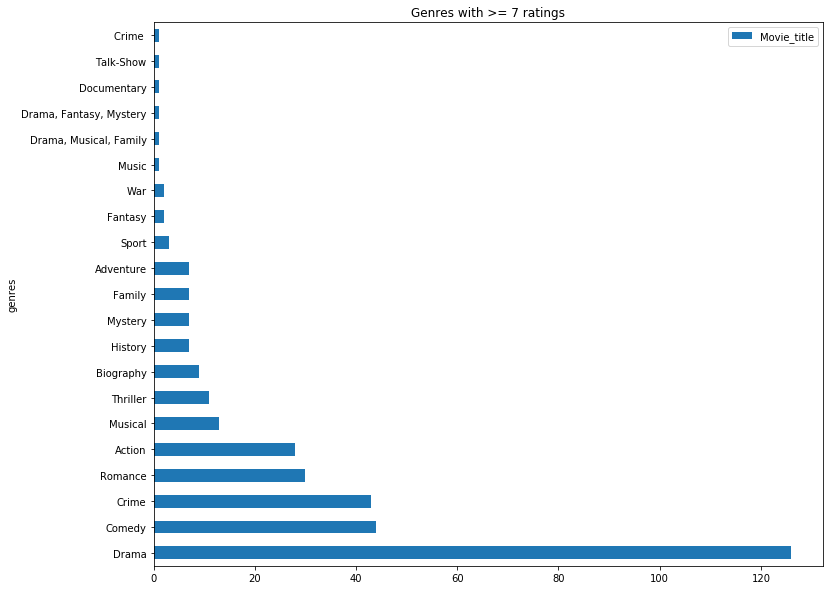

In [48]:
df2[['Movie_title']].plot.barh(stacked=True, title = 'Genres with >= 7 ratings', figsize=(12, 10));

### Analysis 2: Average duration / genre

In [60]:
df3 = df[['Movie_title', 'MovieTiming','genres']]

In [61]:
df3.head()

,Movie_title,MovieTiming,genres
Movie_Id,,,
1,Udaan,134.0,Crime
1,Udaan,134.0,Drama
2,Taare Zameen Par,165.0,Drama
2,Taare Zameen Par,165.0,Family
3,Zakhm,125.0,Drama


In [63]:
df4 = df3.groupby(['genres']).mean()
df4['average_duration']  = df4['MovieTiming'].round(2)
del df4['MovieTiming']
df4.sort_values('average_duration', ascending=False, inplace = True )

In [64]:
df4

,average_duration
genres,
"Drama, Musical, Family",172.00
Musical,166.87
Sport,157.00
Action,156.89
Crime,156.00
War,153.50
Adventure,150.70
History,150.36
Music,145.00


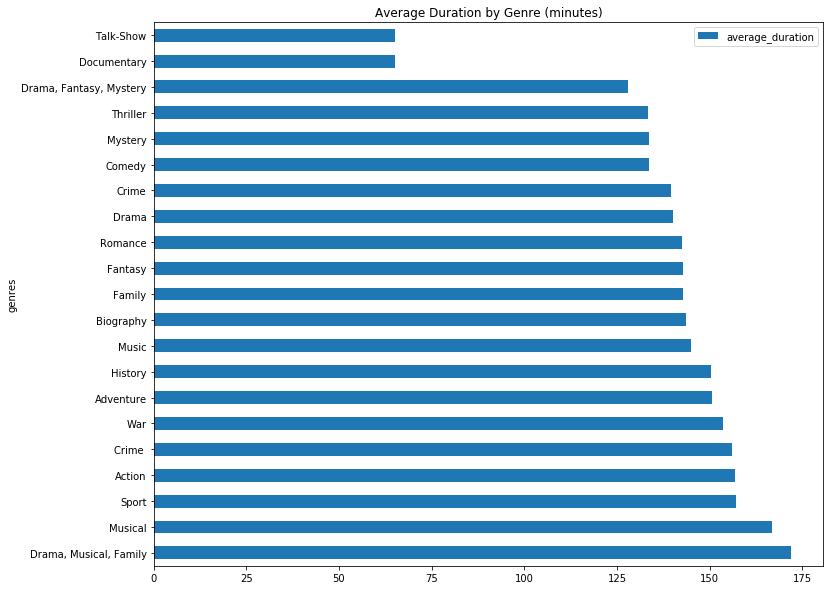

In [66]:
df4[['average_duration']].plot.barh(stacked=True, title = 'Average Duration by Genre (minutes)', figsize=(12, 10));

### Analysis 3:Action and Adventure produced / year after 2000

In [68]:
df5 = df[['ReleaseYear','genres']]

In [70]:
df5.head()

,ReleaseYear,genres
Movie_Id,,
1,2010,Crime
1,2010,Drama
2,2007,Drama
2,2007,Family
3,1998,Drama


In [74]:
df6 = df5[df5['ReleaseYear']>2000]

In [75]:
df6.shape

(355, 2)

#### Selecting only Action

In [78]:
df7 = df6[df6['genres'] == 'Action']

In [79]:
df7.shape

(26, 2)

In [80]:
df8 = df7.groupby(['ReleaseYear']).count()

In [81]:
df8

,genres
ReleaseYear,
2001,2
2002,2
2003,1
2004,2
2005,1
2006,2
2007,1
2009,2
2010,2


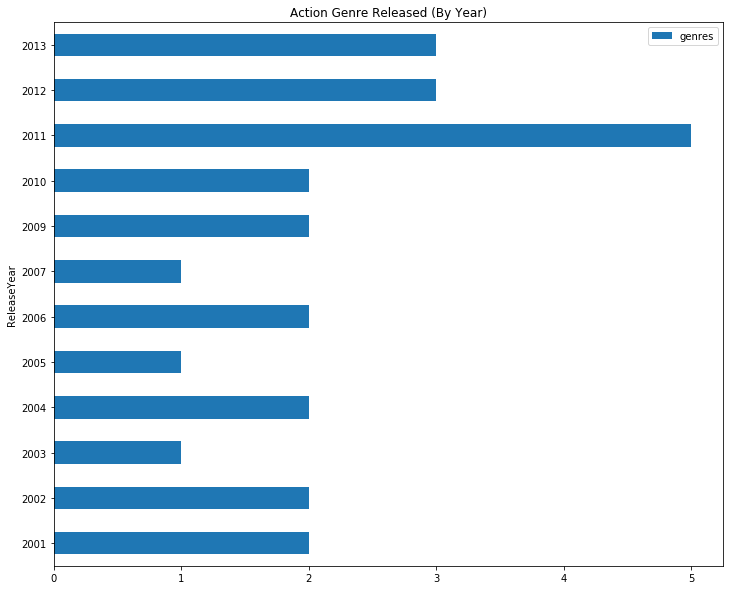

In [98]:
df8[['genres']].plot.barh(stacked=True, title = 'Action Genre Released (By Year)', figsize=(12, 10));

#### Selecting only Adventure

In [83]:
df9 = df6[df6['genres'] == 'Adventure']

In [84]:
df9.shape

(9, 2)

In [85]:
df10 = df9.groupby(['ReleaseYear']).count()

In [86]:
df10

,genres
ReleaseYear,
2001,1
2004,1
2006,1
2007,1
2009,1
2012,2
2013,1
2014,1


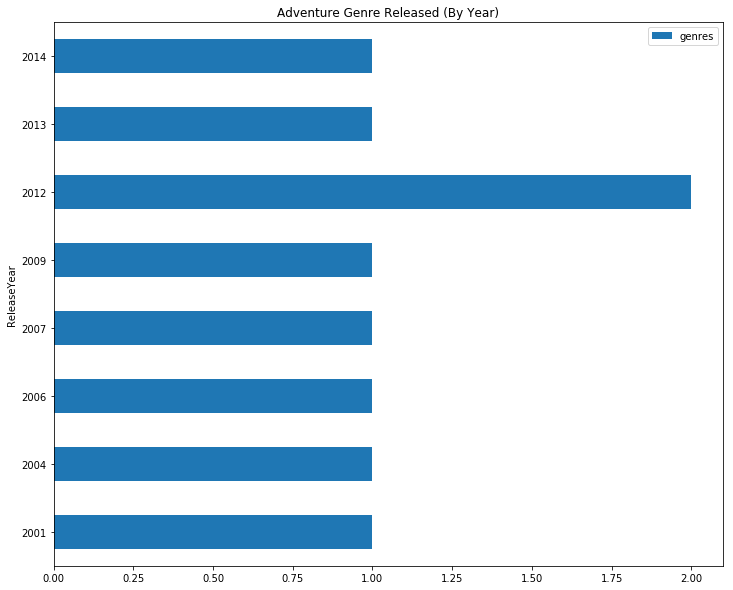

In [99]:
df10[['genres']].plot.barh(stacked=True, title = 'Adventure Genre Released (By Year)', figsize=(12, 10));

### Analysis 4:How many Movies produced / year?

In [103]:
df11=data[['Movie_title','ReleaseYear']]

In [104]:
df11.sort_values('ReleaseYear')

,Movie_title,ReleaseYear
Movie_Id,,
138,Pather Panchali,1955
27,Do Ankhen Barah Haath,1957
28,Kabuliwala,1957
106,Pyaasa,1957
19,Mother India,1957
139,Kaagaz Ke Phool,1959
133,Mughal-E-Azam,1960
137,Sahib Bibi Aur Ghulam,1962
188,Mahanagar,1963


In [96]:
df12=df11.groupby(['ReleaseYear']).count()

In [97]:
df12

,Movie_title
ReleaseYear,
1955,1
1957,4
1959,1
1960,1
1962,1
1963,1
1968,1
1970,1
1971,1


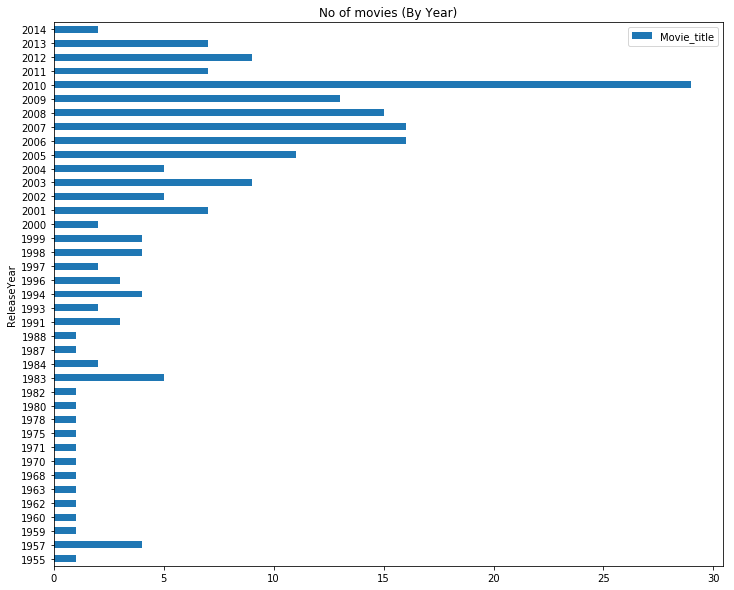

In [100]:
df12[['Movie_title']].plot.barh(stacked=True, title = 'No of movies (By Year)', figsize=(12, 10));

### Analysis 5:Which year got maximum votes?

In [106]:
df13=data[['Movie_title','Votes','ReleaseYear']]

In [109]:
df14=df13.sort_values('ReleaseYear')

In [132]:
df15=df14.groupby(['ReleaseYear'],as_index=False)['Votes'].max()

In [133]:
df15

,ReleaseYear,Votes
0,1955,"17,424"
1,1957,"6,979"
2,1959,"1,585"
3,1960,"5,192"
4,1962,"1,262"
5,1963,"2,527"
6,1968,"4,803"
7,1970,"3,977"
8,1971,"19,600"
9,1975,"43,464"


- By Nikhil